In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive




---


---




## Importing important Libraries


---


---





In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cd '/content/gdrive/MyDrive/AIMS ESSAY/Alice/Compute/Datasets'

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/AIMS ESSAY/Alice/Compute/Datasets'
/content


In [ ]:
import os, glob

path = "/content/gdrive/MyDrive/AIMS ESSAY/DATASET 1/LINK_CSV"
all_files = glob.glob(os.path.join(path, "*.csv"))
linkId_files=[]

for filename in all_files:
  df = pd.read_csv(filename,sep=',')
  linkId_files.append(df)

In [ ]:
## Defining a function that converts the date to datetime format, adds the month, day and week number in the dataframe.

def date_week_day(file):
  #file is the name of the csv file you desire
  file['Date']=pd.to_datetime(file.Date, format='%Y-%m-%d')
  #Adding the month column from date column
  file['Month'] = pd.DatetimeIndex(file['Date']).month
  file['Day'] = pd.DatetimeIndex(file['Date']).day
  file['Weekday'] = file['Date'].dt.day_name()
  file['week'] = file['Date'].dt.week
  file.groupby(
    file['Date'].dt.isocalendar().week
).sum('quantity').rename_axis(index='week')
  newfile=file.loc[file['Date'].between('2016-01-01','2016-12-31')]

  #This will extract the month you want
  #file_month=file.loc[file['Month']==month]
  return newfile

In [ ]:
dataframe=date_week_day(linkId_files[1])
dataframe



---

---

# **Subsampling procedures**


---


---



---






In [ ]:
#ADDING THE DATETIME COLUMN
dataframe.loc[:,'DateTime'] = pd.to_datetime(dataframe.Date.astype(str)+' '+dataframe.Time.astype(str))
#ADDING THE MINUTES COLUMN
dataframe['Minutes']=dataframe['DateTime'].dt.minute
dataframe

In [ ]:
def interval_extraction(df,interval):
  #ETRACTION OF THE MONTHLY DATA
  #df1=df.loc[df['Month']==month]
  #HOURLY SUBSAMPLING
  df1=df[::interval]
  return df1

### **FIVE MINUTES INTERVAL**

In [ ]:
fiveMin=dataframe

### **TEN MINUTES INTERVAL**

In [ ]:
tenMin=interval_extraction(dataframe,2)

## **THIRTY MINUTES INTERVAL**

In [ ]:
thirtyMin=interval_extraction(dataframe,6)

twentyMin=interval_extraction(dataframe,4)
fiveteenMin=interval_extraction(dataframe,3)

## **HOURLY EXTRACTION**

In [ ]:
hourly=interval_extraction(dataframe,12)

# **NORMALIZATION OF SPEED DATA**

In [ ]:
#NORMALIZATION OF THE SPEED DATA
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data 

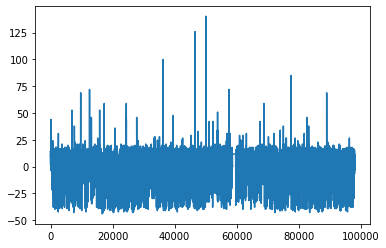

In [ ]:
plt.plot(ReScale(twentyMin['Speed'],1))

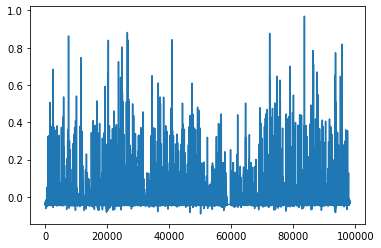

In [ ]:
plt.plot(ReScale(twentyMin['TravelTime'],1/1000))

In [ ]:
#NORMALIZING THE SPEED AND TRAVEL TIME DATA

#NORMALIZATION OF THE SPEED DATA
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data 

tenMin['norm_speed'] = ReScale(tenMin['Speed'],1/100)
tenMin['norm_travelTime'] = ReScale(tenMin['TravelTime'],1/1000)
tenMin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Speed,TravelTime,linkId,Id,Date,Time,Month,Day,Weekday,week,DateTime,Minutes,norm_speed,norm_travelTime
0,59.03,64,4616356,3946540,2016-01-01,00:01:02,1,1,Friday,53,2016-01-01 00:01:02,1,0.129165,-0.041315
2,60.89,62,4616356,3946851,2016-01-01,00:11:02,1,1,Friday,53,2016-01-01 00:11:02,11,0.147765,-0.043315
4,60.89,62,4616356,3947104,2016-01-01,00:21:02,1,1,Friday,53,2016-01-01 00:21:02,21,0.147765,-0.043315
6,60.27,63,4616356,3947346,2016-01-01,00:31:02,1,1,Friday,53,2016-01-01 00:31:02,31,0.141565,-0.042315
8,59.03,64,4616356,3947592,2016-01-01,00:41:02,1,1,Friday,53,2016-01-01 00:41:02,41,0.129165,-0.041315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98168,55.30,68,4616356,2812793,2016-12-31,23:11:06,12,31,Saturday,52,2016-12-31 23:11:06,11,0.091865,-0.037315
98170,52.20,73,4616356,2813018,2016-12-31,23:21:07,12,31,Saturday,52,2016-12-31 23:21:07,21,0.060865,-0.032315
98172,57.17,66,4616356,2813258,2016-12-31,23:31:07,12,31,Saturday,52,2016-12-31 23:31:07,31,0.110565,-0.039315
98174,57.17,66,4616356,2813492,2016-12-31,23:41:06,12,31,Saturday,52,2016-12-31 23:41:06,41,0.110565,-0.039315


In [ ]:
#SAVING THE NORMALIZED CSV FILE DATA 
fiveteenMin.to_csv("fiveteen_norm_path_4616356.csv",index=False)